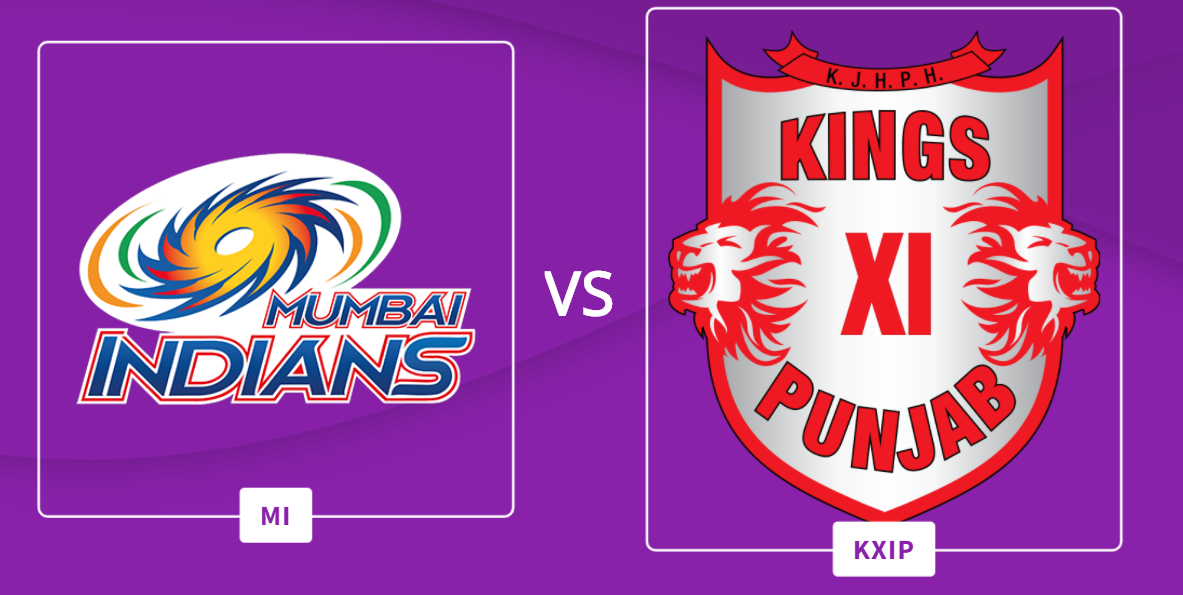

In [117]:
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

pd.set_option('display.max_columns', 50)

In [118]:
deliveries = pd.read_csv("deliveries.csv")
matches = pd.read_csv("matches.csv")


#### Playing Combinations for MI vs KXIP

Mumbai Indians

Probable XI

Rohit Sharma (C), Quinton de Kock (wk), Suryakumar Yadav, Ishan Kishan, Hardik Pandya, Kieron Pollard, Krunal Pandya, James Pattinson, Rahul Chahar, Trent Boult, Jasprit Bumrah

Kings XI Punjab

Probable XI

Chris Gayle, KL Rahul (c & wk), Mayank Agarwal, Nicholas Pooran, Glenn Maxwell, Deepak Hooda, Chris Jordan, Murugan Ashwin, Mohammed Shami, Ravi Bishnoi, Arshdeep Singh

In [119]:
KXIP_bowlers = ['Mohammed Shami', 'A Singh', 'CJ Jordan', 'M Ur Rahman', 'M Ashwin', 'DJ Hooda']
KXIP_batsmen = ['KL Rahul', 'CH Gayle', 'MA Agarwal', 'N Pooran','Mandeep Singh', 'GJ Maxwell']

KXIP_spin_bowlers = ['M Ur Rahman', 'GJ Maxwell', 'DJ Hooda'] #'J Suchith', 'H Brar' Not in probable 11
# R Bishnoi - right arm leg spin bowler (Data not available)
KXIP_fast_bowlers = ['Mohammed Shami', 'A Singh', 'CJ Jordan' ]

# D padikkal new player(RCB batsmen): SR: 126.56, balls faced :192, Runs : 243, matches:7
# R bishnoi: New (KXIP bowler) : ER: 7.85
###################################################################################################

MI_batsmen = ['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan Kishan', 'HH Pandya', 'KH Pandya', 'KA Pollard']
MI_bowlers = ['JJ Bumrah', 'TA Boult', 'RD Chahar', 'KH Pandya', 'KA Pollard']
#J Pattinson data not available

 

################################################################################################################################
# Question 2 : To what type of bowler will Q de Kock get out to?<br>Spin and fast/seam

################################################################################################################################

## 2.1

In [120]:
d1 = deliveries[['match_id','bowler','player_dismissed', 'dismissal_kind']]
QDK_dismissal = d1[(d1.player_dismissed == 'Q de Kock') & (d1.dismissal_kind != 'run out')]
QDK_dismissal.bowler.unique()

array(['AB Dinda', 'P Kumar', 'MM Sharma', 'KV Sharma', 'CJ Anderson',
       'PV Tambe', 'UT Yadav', 'DW Steyn', 'MA Starc', 'IC Pandey',
       'YS Chahal', 'AD Russell', 'SR Watson', 'MJ McClenaghan',
       'DS Kulkarni', 'S Kaushik', 'MP Stoinis', 'MC Henriques',
       'KH Pandya', 'BB Sran', 'PP Chawla', 'R Ashwin', 'D Short',
       'DJ Bravo', 'Kuldeep Yadav', 'I Sharma', 'Mohammed Shami',
       'DL Chahar', 'S Kaul', 'J Archer', 'M Ali', 'S Gopal', 'SP Narine',
       'P Krishna', 'Harbhajan Singh', 'SN Thakur'], dtype=object)

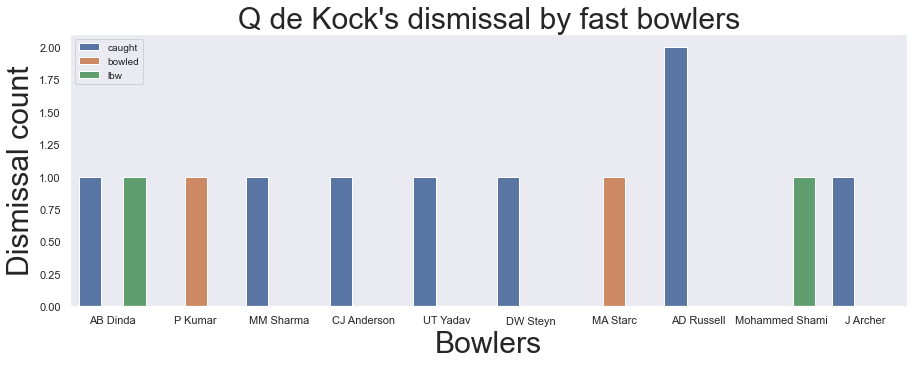

In [121]:
fast_seam_bowlers = ['AB Dinda', 'P Kumar', 'MM Sharma', 'CJ Anderson','UT Yadav', 'DW Steyn', 'MA Starc', 'AD Russell',
                     'Mohammed Shami','J Archer']

spin_bowlers = ['KV Sharma','PV Tambe', 'S Kaushik', 'KH Pandya', 'PP Chawla', 'R Ashwin', 'D Short',
                'Kuldeep Yadav', 'M Ali', 'S Gopal', 'SP Narine','Harbhajan Singh']

medium_fast_bowlers = ['IC Pandey', 'YS Chahal', 'SR Watson', 'MJ McClenaghan', 'DS Kulkarni', 'MP Stoinis','MC Henriques',
                       'BB Sran', 'DJ Bravo','I Sharma', 'DL Chahar','S Kaul', 'P Krishna', 'SN Thakur']

QDK_dismissal_fast = QDK_dismissal[QDK_dismissal.bowler.isin(fast_seam_bowlers)]
QDK_dismissal_spin = QDK_dismissal[QDK_dismissal.bowler.isin(spin_bowlers)]
QDK_dismissal_fast_medium = QDK_dismissal[QDK_dismissal.bowler.isin(medium_fast_bowlers)]
plt.figure(figsize=(15,5))
sns.countplot(x = "bowler", hue = "dismissal_kind",data = QDK_dismissal_fast)
plt.legend(prop={'size':10})
plt.title("Q de Kock's dismissal by fast bowlers",fontsize=30)
plt.xlabel("Bowlers",fontsize=30)
plt.ylabel("Dismissal count",fontsize=30)
plt.show()

Mohammad shami who is currently a fast bowler of KXIP could dismiss Q de Kock in today's match

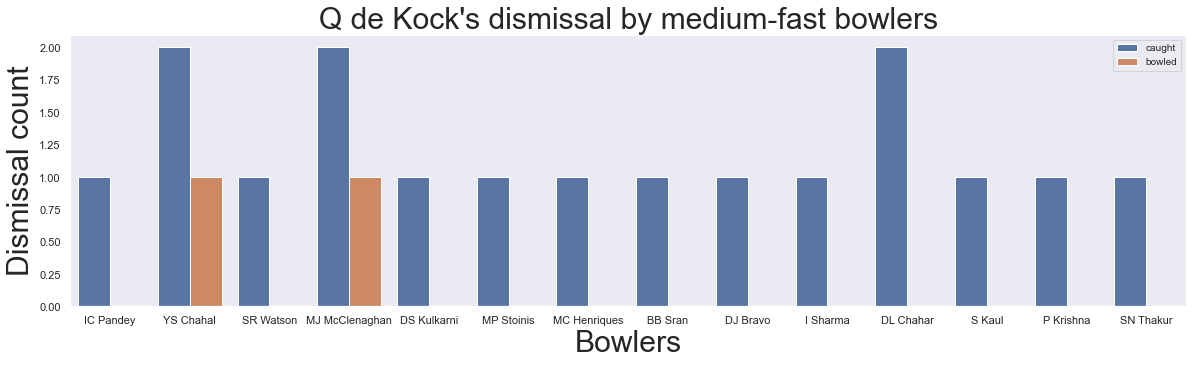

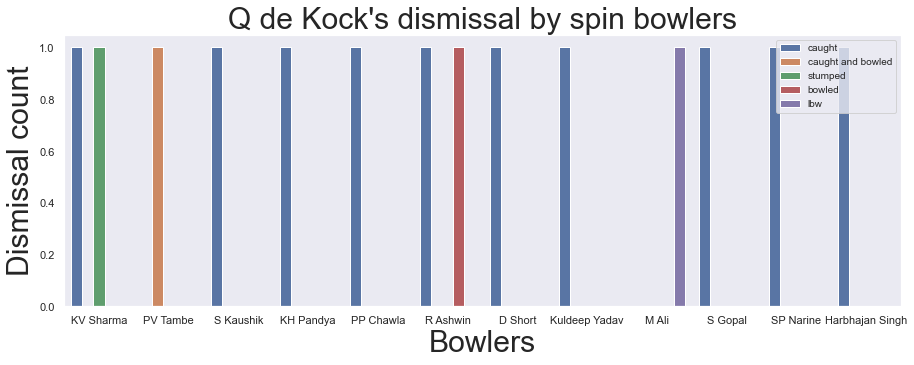

In [122]:
plt.figure(figsize=(20,5))
sns.countplot(x = "bowler", hue = "dismissal_kind",data = QDK_dismissal_fast_medium)
plt.legend(prop={'size':10})
plt.title("Q de Kock's dismissal by medium-fast bowlers",fontsize=30)
plt.xlabel("Bowlers",fontsize=30)
plt.ylabel("Dismissal count",fontsize=30)
plt.show()

plt.figure(figsize=(15,5))
sns.countplot(x = "bowler", hue = "dismissal_kind",data = QDK_dismissal_spin)
plt.legend(prop={'size':10})
plt.title("Q de Kock's dismissal by spin bowlers",fontsize=30)
plt.xlabel("Bowlers",fontsize=30)
plt.ylabel("Dismissal count",fontsize=30)
plt.show()

None of the bowler of KXIP except Mohammad shami has taken wicket of Q de Kock according to dataset

12 19 14


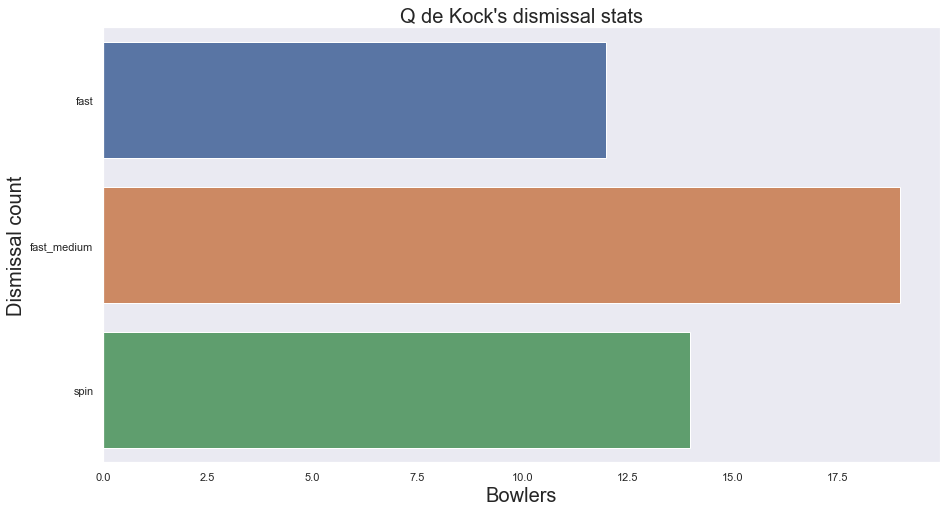

In [123]:
QDK_dismissal_fast["bowling_style"] = "fast"
QDK_dismissal_fast_medium["bowling_style"] = "fast_medium"
QDK_dismissal_spin["bowling_style"] = "spin"

frames = [QDK_dismissal_fast, QDK_dismissal_fast_medium, QDK_dismissal_spin]
QDK_stats = pd.concat(frames)
print(QDK_dismissal_fast.shape[0], QDK_dismissal_fast_medium.shape[0], QDK_dismissal_spin.shape[0] )
plt.figure(figsize=(15,8))
sns.countplot(y = "bowling_style",data = QDK_stats)
plt.title("Q de Kock's dismissal stats",fontsize=20)
plt.xlabel("Bowlers",fontsize=20)
plt.ylabel("Dismissal count",fontsize=20)
plt.show()

## Q de Kock is a Left-handed style batsman. <br> hence, it is important to check wicket taking capability of KXIP bowlers against Left handed batsmen

## 2.2

### KXIP Fast  and spin bowlers against Left and Right handed batting style

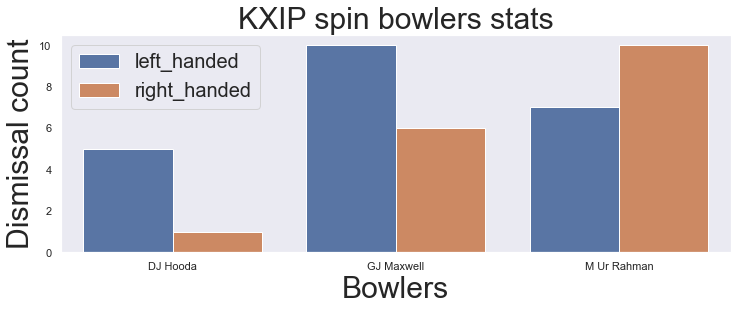

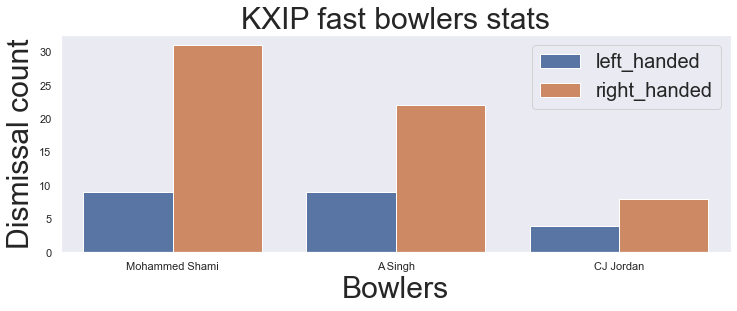

In [124]:
# Fast/medium fast/seam Bowlers
#KXIP_fast_bowlers = ['Mohammed Shami', 'A Singh', 'CJ Jordan' ]

d2 = deliveries[['match_id','bowler','batsman','player_dismissed', 'dismissal_kind']]
KXIP_fast = d2[(d2.bowler.isin(KXIP_fast_bowlers)) & (d2.dismissal_kind != 'run out')]

# players dismissed by KXIP fast/seam/medium fast bowlers
batsmen_all_KXIP = KXIP_fast.player_dismissed.unique()

#batsmen with left-handed batting style dismissed by KXIP fast bowlers
batsmen_left_handed = ['DA Warner', 'BA Stokes', 'Yuvraj Singh', 'SK Raina', 'S Dhawan', 'AC Gilchrist','G Gambhir', 'JEC Franklin',
'Shakib Al Hasan','NLTC Perera', 'NJ Maddinson', 'PA Patel', 'RA Jadeja', 'Bipul Sharma', 'KH Pandya', '',
'RR Pant','C Ingram']

def Diff(li1, li2):
    return (list(list(set(li1)-set(li2)) + list(set(li2)-set(li1))))

batsmen_right_handed_ = Diff(batsmen_all_KXIP, batsmen_left_handed)
batsmen_right_handed = batsmen_right_handed_[1:] # removed nan


KXIP_fast_left = KXIP_fast[KXIP_fast.player_dismissed.isin(batsmen_left_handed)]
KXIP_fast_left["batting_style"] = "left_handed"
KXIP_fast_right = KXIP_fast[KXIP_fast.player_dismissed.isin(batsmen_right_handed)]
KXIP_fast_right["batting_style"] = "right_handed"
fr = [KXIP_fast_left, KXIP_fast_right]
KXIP_fast_bowlers_stats = pd.concat(fr)

################################################################################################################################
# Spin bowlers

#KXIP_spin_bowlers = ['M Ur Rahman', 'GJ Maxwell', 'DJ Hooda'] 
d3 = deliveries[['match_id','bowler','batsman','player_dismissed', 'dismissal_kind']]
KXIP_spin = d3[(d3.bowler.isin(KXIP_spin_bowlers)) & (d3.dismissal_kind != 'run out')]

# players dismissed by KXIP fast/seam/medium fast bowlers
batsmen_left = ['CH Gayle', 'PA Patel', 'DA Warner', 'Yuvraj Singh', 'RR Pant', 'S Aravind', 'SS Tiwary', 
                'SK Raina', 'Shakib Al Hasan', 'DA Miller', 'S Dhawan', 'C Munro', 'G Gambhir','SP Narine', 'PP Chawla',
               'D Short','E Lewis', 'Ishan Kishan']
batsmen_right = ['Mandeep Singh','DR Smith', 'LMP Simmons', 'MK Pandey', 'KD Karthik','V Kohli','M Vohra', 
                 'SS Iyer', 'CA Lynn', 'BA Stokes', 'JC Buttler','J Archer', 'SV Samson', 'RA Tripathi', 'J Bairstow' ]

KXIP_spin_left = KXIP_spin[KXIP_spin.player_dismissed.isin(batsmen_left)]
KXIP_spin_left["batting_style"] = "left_handed"
KXIP_spin_right = KXIP_spin[KXIP_spin.player_dismissed.isin(batsmen_right)]
KXIP_spin_right["batting_style"] = "right_handed"
f = [KXIP_spin_left, KXIP_spin_right]
KXIP_spin_bowlers_stats = pd.concat(f)

# plot- spin bowlers
plt.figure(figsize=(12,4))
sns.countplot(x = "bowler", hue = "batting_style",data = KXIP_spin_bowlers_stats)
plt.legend(prop={'size':20})
plt.title("KXIP spin bowlers stats",fontsize=30)
plt.xlabel("Bowlers",fontsize=30)
plt.ylabel("Dismissal count",fontsize=30)
plt.show()

# plot- fast bowlers
plt.figure(figsize=(12,4))
sns.countplot(x = "bowler", hue = "batting_style",data = KXIP_fast_bowlers_stats)
plt.legend(prop={'size':20})
plt.title("KXIP fast bowlers stats",fontsize=30)
plt.xlabel("Bowlers",fontsize=30)
plt.ylabel("Dismissal count",fontsize=30)
plt.show()

## Performance of Fast/Seam bowlers in both batting styles(left handed or right handed) seems better than Spin bowlers of KXIP.
# Hence, Q de Kock will get out to Fast.Seam type of Bowler in MI vs KXIP match<br>Let's try to find the Associations with aprioi algorithm

# 2.3 Apriori 
## For all MI bowlers

In [125]:
KXIP_fast_bowlers_stats["bowling_style"] = "fast/seam"
KXIP_spin_bowlers_stats["bowling_style"] = "spin"
a1 = KXIP_fast_bowlers_stats[["bowler","bowling_style","player_dismissed", "batting_style", "dismissal_kind"]]
a2 = KXIP_spin_bowlers_stats[["bowler","bowling_style","player_dismissed", "batting_style", "dismissal_kind"]]
fa = [a1, a2]
associations_bowler_batsmen = pd.concat(fa)
df=pd.get_dummies(associations_bowler_batsmen)
df.head()

,bowler_A Singh,bowler_CJ Jordan,bowler_DJ Hooda,bowler_GJ Maxwell,bowler_M Ur Rahman,bowler_Mohammed Shami,bowling_style_fast/seam,bowling_style_spin,player_dismissed_AC Gilchrist,player_dismissed_AD Russell,player_dismissed_AJ Finch,player_dismissed_AM Rahane,player_dismissed_AT Rayudu,player_dismissed_BA Stokes,player_dismissed_BB McCullum,player_dismissed_Bipul Sharma,player_dismissed_C Ingram,player_dismissed_C Munro,player_dismissed_CA Lynn,player_dismissed_CH Gayle,player_dismissed_D Short,player_dismissed_D du Preez,player_dismissed_DA Miller,player_dismissed_DA Warner,player_dismissed_DB Ravi Teja,...,player_dismissed_SD Lad,player_dismissed_SK Raina,player_dismissed_SL Malinga,player_dismissed_SP Narine,player_dismissed_SR Tendulkar,player_dismissed_SR Watson,player_dismissed_SS Iyer,player_dismissed_SS Tiwary,player_dismissed_SV Samson,player_dismissed_SW Billings,player_dismissed_Shakib Al Hasan,player_dismissed_TL Suman,player_dismissed_V Kohli,player_dismissed_V Sehwag,player_dismissed_W Jaffer,player_dismissed_WP Saha,player_dismissed_Y Nagar,player_dismissed_Yuvraj Singh,batting_style_left_handed,batting_style_right_handed,dismissal_kind_bowled,dismissal_kind_caught,dismissal_kind_caught and bowled,dismissal_kind_lbw,dismissal_kind_stumped
9029,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
12072,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
33912,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
35500,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
55727,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [126]:
#pip install mlxtend
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bowling_style_fast/seam),(bowler_A Singh),0.680328,0.254098,0.254098,0.373494,1.469880,0.081228,1.190574
1,(bowler_A Singh),(bowling_style_fast/seam),0.254098,0.680328,0.254098,1.000000,1.469880,0.081228,inf
2,(batting_style_right_handed),(bowler_A Singh),0.639344,0.254098,0.180328,0.282051,1.110008,0.017872,1.038934
3,(bowler_A Singh),(batting_style_right_handed),0.254098,0.639344,0.180328,0.709677,1.110008,0.017872,1.242259
4,(dismissal_kind_caught),(bowler_A Singh),0.655738,0.254098,0.188525,0.287500,1.131452,0.021903,1.046879
...,...,...,...,...,...,...,...,...,...
117,"(bowling_style_fast/seam, batting_style_right_...","(bowler_Mohammed Shami, dismissal_kind_caught)",0.500000,0.204918,0.163934,0.327869,1.600000,0.061475,1.182927
118,(bowler_Mohammed Shami),"(bowling_style_fast/seam, dismissal_kind_caugh...",0.327869,0.319672,0.163934,0.500000,1.564103,0.059124,1.360656
119,(dismissal_kind_caught),"(bowler_Mohammed Shami, bowling_style_fast/sea...",0.655738,0.254098,0.163934,0.250000,0.983871,-0.002687,0.994536
120,(batting_style_right_handed),"(bowler_Mohammed Shami, bowling_style_fast/sea...",0.639344,0.204918,0.163934,0.256410,1.251282,0.032921,1.069248


In [127]:
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(bowler_GJ Maxwell),(bowling_style_spin),0.131148,0.319672,0.131148,1.000000,3.128205,0.089223,inf
8,(bowling_style_spin),(bowler_M Ur Rahman),0.319672,0.139344,0.139344,0.435897,3.128205,0.094800,1.525708
9,(bowler_M Ur Rahman),(bowling_style_spin),0.139344,0.319672,0.139344,1.000000,3.128205,0.094800,inf
6,(bowling_style_spin),(bowler_GJ Maxwell),0.319672,0.131148,0.131148,0.410256,3.128205,0.089223,1.473272
40,"(bowling_style_fast/seam, dismissal_kind_caught)",(bowler_A Singh),0.450820,0.254098,0.188525,0.418182,1.645748,0.073972,1.282018
...,...,...,...,...,...,...,...,...,...
73,(bowling_style_fast/seam),"(dismissal_kind_caught, batting_style_left_han...",0.680328,0.237705,0.131148,0.192771,0.810968,-0.030570,0.944336
75,(batting_style_left_handed),"(bowling_style_fast/seam, dismissal_kind_caught)",0.360656,0.450820,0.131148,0.363636,0.806612,-0.031443,0.862998
70,"(bowling_style_fast/seam, dismissal_kind_caught)",(batting_style_left_handed),0.450820,0.360656,0.131148,0.290909,0.806612,-0.031443,0.901639
16,(bowling_style_fast/seam),(batting_style_left_handed),0.680328,0.360656,0.180328,0.265060,0.734940,-0.065036,0.869927


In [128]:
rules[rules.lift>0.98]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bowling_style_fast/seam),(bowler_A Singh),0.680328,0.254098,0.254098,0.373494,1.469880,0.081228,1.190574
1,(bowler_A Singh),(bowling_style_fast/seam),0.254098,0.680328,0.254098,1.000000,1.469880,0.081228,inf
2,(batting_style_right_handed),(bowler_A Singh),0.639344,0.254098,0.180328,0.282051,1.110008,0.017872,1.038934
3,(bowler_A Singh),(batting_style_right_handed),0.254098,0.639344,0.180328,0.709677,1.110008,0.017872,1.242259
4,(dismissal_kind_caught),(bowler_A Singh),0.655738,0.254098,0.188525,0.287500,1.131452,0.021903,1.046879
...,...,...,...,...,...,...,...,...,...
117,"(bowling_style_fast/seam, batting_style_right_...","(bowler_Mohammed Shami, dismissal_kind_caught)",0.500000,0.204918,0.163934,0.327869,1.600000,0.061475,1.182927
118,(bowler_Mohammed Shami),"(bowling_style_fast/seam, dismissal_kind_caugh...",0.327869,0.319672,0.163934,0.500000,1.564103,0.059124,1.360656
119,(dismissal_kind_caught),"(bowler_Mohammed Shami, bowling_style_fast/sea...",0.655738,0.254098,0.163934,0.250000,0.983871,-0.002687,0.994536
120,(batting_style_right_handed),"(bowler_Mohammed Shami, bowling_style_fast/sea...",0.639344,0.204918,0.163934,0.256410,1.251282,0.032921,1.069248


In [129]:
# Q de Kock is left handed Batsman
rules[rules.antecedents.values == frozenset({'batting_style_left_handed'})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
17,(batting_style_left_handed),(bowling_style_fast/seam),0.360656,0.680328,0.180328,0.500000,0.734940,-0.065036,0.639344
25,(batting_style_left_handed),(bowling_style_spin),0.360656,0.319672,0.180328,0.500000,1.564103,0.065036,1.360656
29,(batting_style_left_handed),(dismissal_kind_caught),0.360656,0.655738,0.237705,0.659091,1.005114,0.001209,1.009836
75,(batting_style_left_handed),"(bowling_style_fast/seam, dismissal_kind_caught)",0.360656,0.450820,0.131148,0.363636,0.806612,-0.031443,0.862998
93,(batting_style_left_handed),"(bowling_style_spin, dismissal_kind_caught)",0.360656,0.204918,0.106557,0.295455,1.441818,0.032653,1.128503


### Above are association rules for KXIP bowlers wicket taking capability against left or right handed batting style

## Q de Kock Wickets
### let us check the association rules for Q de Kock's dismissal

In [130]:
QDK_assoc1 = QDK_dismissal_fast[["player_dismissed", "bowler", "bowling_style", "dismissal_kind"]]
QDK_assoc2 = QDK_dismissal_fast_medium[["player_dismissed", "bowler", "bowling_style", "dismissal_kind"]]
QDK_assoc3 = QDK_dismissal_spin[["player_dismissed", "bowler", "bowling_style", "dismissal_kind"]]

qa = [QDK_assoc1, QDK_assoc2, QDK_assoc3]
QDK_assoc = pd.concat(qa)
df_=pd.get_dummies(QDK_assoc)
df_.head()

,player_dismissed_Q de Kock,bowler_AB Dinda,bowler_AD Russell,bowler_BB Sran,bowler_CJ Anderson,bowler_D Short,bowler_DJ Bravo,bowler_DL Chahar,bowler_DS Kulkarni,bowler_DW Steyn,bowler_Harbhajan Singh,bowler_I Sharma,bowler_IC Pandey,bowler_J Archer,bowler_KH Pandya,bowler_KV Sharma,bowler_Kuldeep Yadav,bowler_M Ali,bowler_MA Starc,bowler_MC Henriques,bowler_MJ McClenaghan,bowler_MM Sharma,bowler_MP Stoinis,bowler_Mohammed Shami,bowler_P Krishna,bowler_P Kumar,bowler_PP Chawla,bowler_PV Tambe,bowler_R Ashwin,bowler_S Gopal,bowler_S Kaul,bowler_S Kaushik,bowler_SN Thakur,bowler_SP Narine,bowler_SR Watson,bowler_UT Yadav,bowler_YS Chahal,bowling_style_fast,bowling_style_fast_medium,bowling_style_spin,dismissal_kind_bowled,dismissal_kind_caught,dismissal_kind_caught and bowled,dismissal_kind_lbw,dismissal_kind_stumped
95097,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
95924,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
97962,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
112109,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
114868,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0


In [131]:
#pip install mlxtend
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
frequent_itemsets_ = apriori(df_, min_support=0.1, use_colnames=True)

rules_ = association_rules(frequent_itemsets_, metric="lift", min_threshold=0.7)


rules_.sort_values('lift',ascending = False)

rules_[rules_.lift>0.98]
#rules_.antecedents.values

rules_[rules_.antecedents.values == frozenset({'bowling_style_fast'})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bowling_style_fast),(player_dismissed_Q de Kock),0.266667,1.000000,0.266667,1.000000,1.000000,0.00000,inf
11,(bowling_style_fast),(dismissal_kind_caught),0.266667,0.777778,0.177778,0.666667,0.857143,-0.02963,0.666667
20,(bowling_style_fast),"(dismissal_kind_caught, player_dismissed_Q de ...",0.266667,0.777778,0.177778,0.666667,0.857143,-0.02963,0.666667


In [132]:
rules_[rules_.antecedents.values == frozenset({'bowling_style_fast_medium'})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(bowling_style_fast_medium),(player_dismissed_Q de Kock),0.422222,1.000000,0.422222,1.000000,1.000000,0.000000,inf
13,(bowling_style_fast_medium),(dismissal_kind_caught),0.422222,0.777778,0.377778,0.894737,1.150376,0.049383,2.111111
25,(bowling_style_fast_medium),"(dismissal_kind_caught, player_dismissed_Q de ...",0.422222,0.777778,0.377778,0.894737,1.150376,0.049383,2.111111


In [133]:
rules_[rules_.antecedents.values == frozenset({'bowling_style_spin'})]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(bowling_style_spin),(player_dismissed_Q de Kock),0.311111,1.000000,0.311111,1.000000,1.000000,0.000000,inf
14,(bowling_style_spin),(dismissal_kind_caught),0.311111,0.777778,0.222222,0.714286,0.918367,-0.019753,0.777778
31,(bowling_style_spin),"(dismissal_kind_caught, player_dismissed_Q de ...",0.311111,0.777778,0.222222,0.714286,0.918367,-0.019753,0.777778


# From above lift values, the lift values for Q de Kocks dismissal by fasta nad medium fast bowlers combined is slightly higher than with Spin bowlers.

################################################################################################################################
# Question 3: How many wickets will KXIP loose in power play?
################################################################################################################################

## 3.1

### Wickets taking capability of MI bowlers in Power play(over 1-6)

In [134]:
MI_b = deliveries[deliveries.bowler.isin(MI_bowlers)]
MI_b.dismissal_kind.fillna(0, inplace=True)
MI_bowlers_ = MI_b[(MI_b.over <= 6) & (MI_b.dismissal_kind != 'run out') & (MI_b.dismissal_kind != 0)]
poweplay_MI_bowlers = MI_bowlers_.groupby(['match_id', 'bowler'])['dismissal_kind'].count().reset_index(name = "powerplay_wickets")

import plotly.express as px
import plotly.graph_objects as go
fig = px.bar(poweplay_MI_bowlers, x=poweplay_MI_bowlers.index, y='powerplay_wickets',
             hover_data=['match_id','bowler','powerplay_wickets'], color='bowler',title='Wickets in power play by MI Bowlers')
fig.show()


## 3.2


### Wickets taking capability of MI bowlers against KXIP batsmen in powerplay

In [135]:
MI_b_ = deliveries[(deliveries.bowler.isin(MI_bowlers)) & (deliveries.batsman.isin(KXIP_batsmen))]
MI_b_.dismissal_kind.fillna(0, inplace=True)

# removed "run out" here as the question is wickets loss by KXIP not the wickets taken by MI bowlers
MI_bowlers_1 = MI_b_[(MI_b_.over <= 6)  & (MI_b_.dismissal_kind != 0)] 
poweplay_MI_bowlers_ = MI_bowlers_1.groupby(['match_id', 'bowler'])['dismissal_kind'].count().reset_index(name = "powerplay_wickets")
import plotly.express as px
import plotly.graph_objects as go
fig = px.bar(poweplay_MI_bowlers_, x=poweplay_MI_bowlers_.index, y='powerplay_wickets',
             hover_data=['match_id','bowler','powerplay_wickets'], color='bowler',title='Wickets in power play by MI Bowlers against KXIP bowlers')
fig.show()
MI_bowlers_1[["batsman", "bowler", "dismissal_kind"]]

,batsman,bowler,dismissal_kind
150858,KL Rahul,TA Boult,caught
163303,GJ Maxwell,JJ Bumrah,bowled


In [136]:
t1 = poweplay_MI_bowlers.bowler.unique()
for i in t1:
    print("Average wickets taken by ", i, " in powerplay : ",poweplay_MI_bowlers[poweplay_MI_bowlers.bowler == i].powerplay_wickets.mean())

print("\n")    
t2 = poweplay_MI_bowlers_.bowler.unique()
for i in t2:
    print("Wickets taken by ", i, " in powerplay against KXIP batsman : ",poweplay_MI_bowlers_[poweplay_MI_bowlers_.bowler == i].powerplay_wickets.max())

Average wickets taken by  KH Pandya  in powerplay :  1.1666666666666667
Average wickets taken by  JJ Bumrah  in powerplay :  1.1818181818181819
Average wickets taken by  TA Boult  in powerplay :  1.125
Average wickets taken by  KA Pollard  in powerplay :  1.0
Average wickets taken by  RD Chahar  in powerplay :  1.0


Wickets taken by  TA Boult  in powerplay against KXIP batsman :  1
Wickets taken by  JJ Bumrah  in powerplay against KXIP batsman :  1


## Probable MI Bowlers in powerplay are TA Boult, RD Chahar, K Pollard
## Hence by looking at past statistics the wicket loss by KXIP will be 2-3, most probably 2

################################################################################################################################
# Question 4: How will KL Rahul get out ? (Caught, Bowled, LBW or others, not out)
################################################################################################################################

## 4.1


### KL Rahul Past performance with MI bowlers

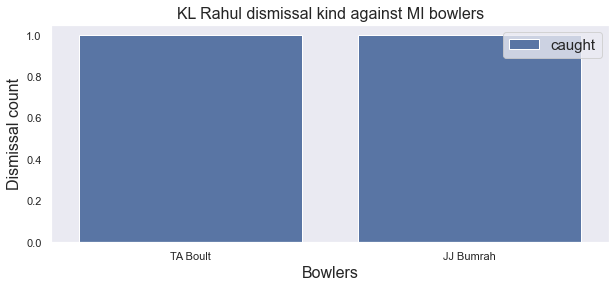

In [137]:
MI_b__KL = MI_b_[["match_id", "batsman", "bowler", "player_dismissed", "dismissal_kind"]][(MI_b_.player_dismissed == "KL Rahul")]
plt.figure(figsize=(10,4))
sns.countplot(x = "bowler", hue = "dismissal_kind",data = MI_b__KL)
plt.legend(prop={'size':15})
plt.title("KL Rahul dismissal kind against MI bowlers",fontsize=16)
plt.xlabel("Bowlers",fontsize=16)
plt.ylabel("Dismissal count",fontsize=16)
plt.show()

## 4.2

### KL Rahul dismissal kind so far

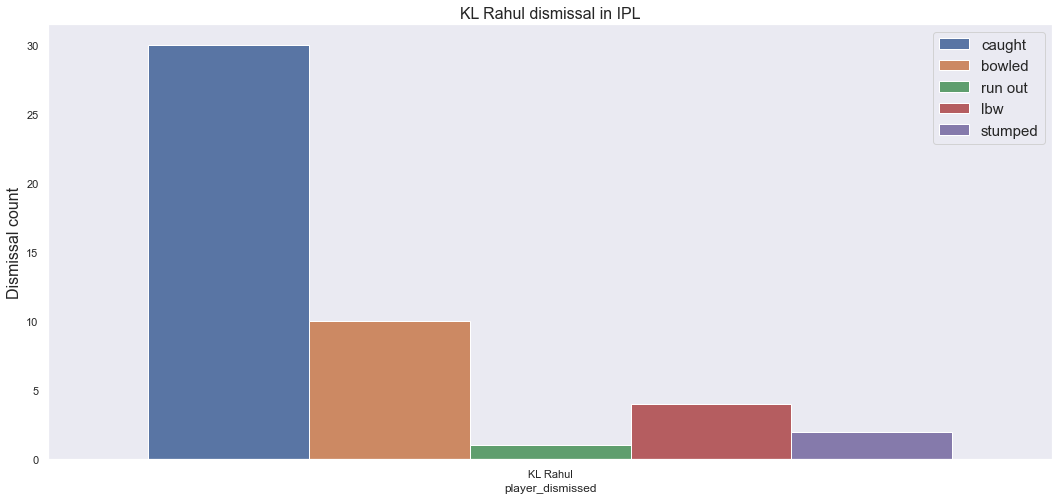

In [138]:
KL = deliveries[deliveries.player_dismissed == "KL Rahul"]
plt.figure(figsize=(18,8))
sns.countplot(x = "player_dismissed", hue = "dismissal_kind",data = KL)
plt.legend(prop={'size':15})
plt.title("KL Rahul dismissal in IPL",fontsize=16)
plt.ylabel("Dismissal count",fontsize=16)
plt.show()

## From the analysis in 4.1 and 4.2 , KL Rahul will get out with "Caught" as a dismissal kind

################################################################################################################################
# Question 5: How many wickets will fall in total during match?
################################################################################################################################

## 5.1

## Average wickets taken by each bowler

In [139]:
KXIP_bowlers = ['Mohammed Shami', 'A Singh', 'CJ Jordan', 'M Ur Rahman', 'M Ashwin', 'DJ Hooda']
KXIP_batsmen = ['KL Rahul', 'CH Gayle', 'MA Agarwal', 'N Pooran','Mandeep Singh', 'GJ Maxwell']

KXIP_spin_bowlers = ['M Ur Rahman', 'GJ Maxwell', 'DJ Hooda'] #'J Suchith', 'H Brar' Not in probable 11
# R Bishnoi - right arm leg spin bowler (Data not available)
KXIP_fast_bowlers = ['Mohammed Shami', 'A Singh', 'CJ Jordan' ]
MI_batsmen = ['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan Kishan', 'HH Pandya', 'KH Pandya', 'KA Pollard']
MI_bowlers = ['JJ Bumrah', 'TA Boult', 'RD Chahar', 'KH Pandya', 'KA Pollard']

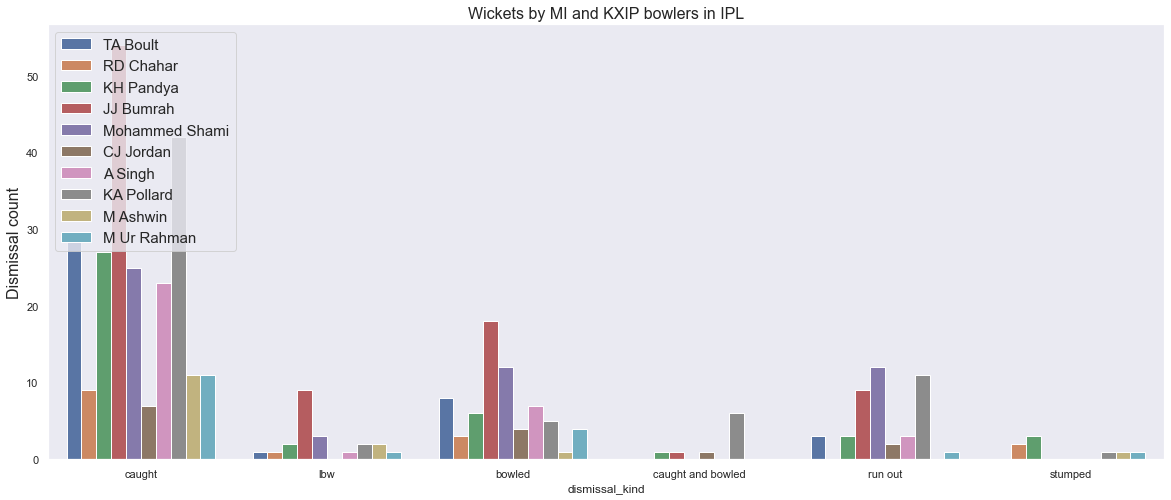

In [140]:
bowlers_MI_KXIP = ['Mohammed Shami', 'A Singh', 'CJ Jordan', 'M Ur Rahman', 'M Ashwin', 
                   'JJ Bumrah', 'TA Boult', 'RD Chahar', 'KH Pandya', 'KA Pollard']

b_MI_KXIP = deliveries[deliveries.bowler.isin(bowlers_MI_KXIP)]
b_MI_KXIP.fillna(0,inplace =True)
b_MI_KXIP_ = b_MI_KXIP[["match_id", "bowler","dismissal_kind"]][b_MI_KXIP.dismissal_kind != 0]

plt.figure(figsize=(20,8))
sns.countplot(x = "dismissal_kind", hue = "bowler",data = b_MI_KXIP_)
plt.legend(prop={'size':15})
plt.title("Wickets by MI and KXIP bowlers in IPL",fontsize=16)
plt.ylabel("Dismissal count",fontsize=16)
plt.show()


In [141]:
b_MK = b_MI_KXIP_.groupby(["match_id","bowler"])["dismissal_kind"].count().reset_index(name = "no_of_wickets")
import plotly.express as px
import plotly.graph_objects as go

fig = px.bar(b_MK, x=b_MK.index, y='no_of_wickets',
             hover_data=['match_id','bowler','no_of_wickets'], color='bowler',title='Wickets by MI and KXIP bowlers(matchwise)', width=1200, height=500)
fig.show()

for i in b_MK.bowler.unique():
    print("Frequent number of wickets taken by ", i, " : ",b_MK[b_MK.bowler==i].no_of_wickets.min() , "-", b_MK[b_MK.bowler==i].no_of_wickets.mean())

Frequent number of wickets taken by  TA Boult  :  1 - 1.5769230769230769
Frequent number of wickets taken by  RD Chahar  :  1 - 1.6666666666666667
Frequent number of wickets taken by  JJ Bumrah  :  1 - 1.75
Frequent number of wickets taken by  KH Pandya  :  1 - 1.75
Frequent number of wickets taken by  Mohammed Shami  :  1 - 1.4857142857142858
Frequent number of wickets taken by  CJ Jordan  :  1 - 2.3333333333333335
Frequent number of wickets taken by  A Singh  :  1 - 1.7894736842105263
Frequent number of wickets taken by  KA Pollard  :  1 - 1.488888888888889
Frequent number of wickets taken by  M Ashwin  :  1 - 1.5
Frequent number of wickets taken by  M Ur Rahman  :  1 - 1.8


## From above analysis we can say that wickets could be in between 9-11

## 5.1.1

### Powerplay, mid overs and death over analysis of bowlers

In [142]:
# powerplay
b_powerplay = b_MI_KXIP[["match_id", "bowler","over","dismissal_kind"]][(b_MI_KXIP.dismissal_kind != 0) & (b_MI_KXIP.over <= 6)]
b_pp = b_powerplay.groupby(["match_id","bowler"])["dismissal_kind"].count().reset_index(name = "no_of_wickets")
fig = px.bar(b_pp, x=b_pp.index, y='no_of_wickets',
             hover_data=['match_id','bowler','no_of_wickets'], color='bowler',title='Wickets by MI and KXIP bowlers(matchwise) in Powerplay', width=1200, height=500)
fig.show()

b_death = b_MI_KXIP[["match_id", "bowler","over","dismissal_kind"]][(b_MI_KXIP.dismissal_kind != 0) & (b_MI_KXIP.over >= 15)]
b_d = b_death.groupby(["match_id","bowler"])["dismissal_kind"].count().reset_index(name = "no_of_wickets")
fig = px.bar(b_d, x=b_d.index, y='no_of_wickets',
             hover_data=['match_id','bowler','no_of_wickets'], color='bowler',title='Wickets by MI and KXIP bowlers(matchwise) in Powerplay', width=1200, height=500)
fig.show()

b_mid = b_MI_KXIP[["match_id", "bowler","over","dismissal_kind"]][(b_MI_KXIP.dismissal_kind != 0) & ((b_MI_KXIP.over >= 6) & (b_MI_KXIP.over <= 15))]
b_m = b_mid.groupby(["match_id","bowler"])["dismissal_kind"].count().reset_index(name = "no_of_wickets")
fig = px.bar(b_m, x=b_m.index, y='no_of_wickets',
             hover_data=['match_id','bowler','no_of_wickets'], color='bowler',title='Wickets by MI and KXIP bowlers(matchwise) in Powerplay', width=1200, height=500)
fig.show()

print("\nPower Play")
for i in b_pp.bowler.unique():
    print("Frequent number of wickets taken by ", i, " in power play : ",b_pp[b_pp.bowler==i].no_of_wickets.min() , "-", b_pp[b_pp.bowler==i].no_of_wickets.mean())
    
print("\nDeath Over")
for i in b_d.bowler.unique():
    print("Frequent number of wickets taken by ", i, " in deatrh overs : ",b_d[b_d.bowler==i].no_of_wickets.min() , "-", b_d[b_d.bowler==i].no_of_wickets.mean())
 
print("\nMid Overs")
for i in b_m.bowler.unique():
    print("Frequent number of wickets taken by ", i, " in mid overs : ",b_m[b_m.bowler==i].no_of_wickets.min() , "-", b_m[b_m.bowler==i].no_of_wickets.mean())


Power Play
Frequent number of wickets taken by  KH Pandya  in power play :  1 - 1.1428571428571428
Frequent number of wickets taken by  JJ Bumrah  in power play :  1 - 1.1666666666666667
Frequent number of wickets taken by  Mohammed Shami  in power play :  1 - 1.0
Frequent number of wickets taken by  TA Boult  in power play :  1 - 1.125
Frequent number of wickets taken by  CJ Jordan  in power play :  1 - 1.0
Frequent number of wickets taken by  A Singh  in power play :  1 - 1.1666666666666667
Frequent number of wickets taken by  KA Pollard  in power play :  1 - 1.0
Frequent number of wickets taken by  M Ur Rahman  in power play :  1 - 1.0
Frequent number of wickets taken by  RD Chahar  in power play :  1 - 1.0

Death Over
Frequent number of wickets taken by  TA Boult  in deatrh overs :  1 - 1.4210526315789473
Frequent number of wickets taken by  JJ Bumrah  in deatrh overs :  1 - 1.4871794871794872
Frequent number of wickets taken by  KH Pandya  in deatrh overs :  1 - 1.285714285714285

Death over bowlers KXIP: Mohammed Shami, A Singh, CJ Jordan # MI: JJ Bumrah, TA Boult


## 5.2

### Wickets taken by MI bowlers against KXIP batsmen <br> Wickets taken by KXIP bowlers against MI batsmen

In [143]:
score_df = deliveries[((deliveries.batting_team == "Mumbai Indians") & (deliveries.bowling_team == "Kings XI Punjab")) | ((deliveries.bowling_team == "Mumbai Indians") & (deliveries.batting_team == "Kings XI Punjab"))]

In [144]:
MI_bowls = deliveries[(deliveries.bowler.isin(MI_bowlers)) & (deliveries.batsman.isin(KXIP_batsmen))]
MI_bowls.dismissal_kind.fillna(0, inplace = True)
MI_bowls_ = MI_bowls[["match_id", "over", "batsman", "bowler", "dismissal_kind"]][MI_bowls.dismissal_kind != 0]
MI_bowls_.sort_values(by=['over'])

,match_id,over,batsman,bowler,dismissal_kind
150858,7895,5,KL Rahul,TA Boult,caught
163303,7948,5,GJ Maxwell,JJ Bumrah,bowled
90512,383,7,MA Agarwal,JJ Bumrah,caught
133763,564,8,GJ Maxwell,TA Boult,caught
166862,11145,8,CH Gayle,KH Pandya,caught
79268,336,9,Mandeep Singh,KA Pollard,caught
11665,50,11,GJ Maxwell,JJ Bumrah,bowled
72041,306,11,MA Agarwal,KA Pollard,caught
152491,7902,14,GJ Maxwell,KH Pandya,caught
166901,11145,14,MA Agarwal,KH Pandya,caught


In [145]:
KXIP_bowls = deliveries[(deliveries.bowler.isin(KXIP_bowlers)) & (deliveries.batsman.isin(MI_batsmen))]
KXIP_bowls.dismissal_kind.fillna(0, inplace = True)
KXIP_bowls_ = KXIP_bowls[["match_id", "over", "batsman", "bowler", "dismissal_kind"]][KXIP_bowls.dismissal_kind != 0]
KXIP_bowls_.sort_values(by=['over'])

,match_id,over,batsman,bowler,dismissal_kind
111954,473,2,RG Sharma,Mohammed Shami,run out
158478,7927,13,Ishan Kishan,M Ur Rahman,bowled
166772,11145,13,Q de Kock,Mohammed Shami,lbw
141046,596,16,SA Yadav,M Ashwin,lbw
170551,11315,16,HH Pandya,Mohammed Shami,caught
170556,11315,16,KH Pandya,Mohammed Shami,caught
112059,473,19,KA Pollard,Mohammed Shami,run out
152402,7902,19,KH Pandya,Mohammed Shami,caught
166815,11145,20,HH Pandya,Mohammed Shami,caught


#### As shown in above tables KXIP might loose wickets in following way
powerplay = 2,
mid overs = 2,
Death overs = 2,

#### As shown in above table MI might loose wickets in following way
powerplay = 1
midovers = 2
Death overs = 2

## From above analysis wicket number may vary between 9-11

## 5.3

### Previous season's analysis where maximum number of IPL2020 MI and KXIP players were same 

In [146]:
match_df = pd.read_csv("matches.csv")
match_df = match_df.loc[match_df.dl_applied == 0,:]
# runs and wickets per over #
score_df = pd.merge(score_df, match_df[['id','season', 'winner', 'result', 'dl_applied', 'team1', 'team2']], left_on='match_id', right_on='id')
score_df.player_dismissed.fillna(0, inplace=True)

score_df['player_dismissed'].loc[score_df['player_dismissed'] != 0] = 1
train_df = score_df.groupby(['match_id', 'inning', 'over', 'batting_team', 'winner', 'team1'])[['total_runs', 'player_dismissed']].agg(['sum']).reset_index()
train_df.columns = train_df.columns.get_level_values(0)
# innings score and wickets #
train_df['innings_wickets'] = train_df.groupby(['match_id', 'inning'])['player_dismissed'].cumsum()
train_df['innings_score'] = train_df.groupby(['match_id', 'inning'])['total_runs'].cumsum()
train_df.match_id.unique()

array([   22,    50,    69,   106,   135,   157,   201,   215,   273,
         287,   336,   340,   421,   450,   479,   505,   524,   552,
         597,   619,  7927,  7943, 11145, 11315], dtype=int64)

### let's consider last 2 matches where there is maximum similarity in IPL2020 squads of MI and KXIP
match 11145 and 11315

In [147]:
temp_df = train_df.groupby(['match_id', 'inning'])['total_runs'].sum().reset_index()
temp_df = temp_df.loc[temp_df['inning']==1,:]

temp_df['inning'] = 2
temp_df.columns = ['match_id', 'inning', 'score_target']

train_df = train_df.merge(temp_df, how='left', on = ['match_id', 'inning'])
train_df.score_target.fillna(-1, inplace=True)

# get the remaining target #
def get_remaining_target(row):
    if row['score_target'] == -1.:
        return -1
    else:
        return row['score_target'] - row['innings_score']

train_df['remaining_target'] = train_df.apply(lambda row: get_remaining_target(row),axis=1)

# get the run rate #
train_df['run_rate'] = train_df['innings_score'] / train_df['over']

# get the remaining run rate #
def get_required_rr(row):
    if row['remaining_target'] == -1:
        return -1.
    elif row['over'] == 20:
        return 99
    else:
        return row['remaining_target'] / (20-row['over'])
    
train_df['required_run_rate'] = train_df.apply(lambda row: get_required_rr(row), axis=1)

def get_rr_diff(row):
    if row['inning'] == 1:
        return -1
    else:
        return row['run_rate'] - row['required_run_rate']

train_df['runrate_diff'] = train_df.apply(lambda row: get_rr_diff(row), axis=1)

train_df['is_batting_team'] = (train_df.team1 == train_df['batting_team']).astype('int')

train_df['target'] = (train_df['team1'] == train_df['winner']).astype('int')



### match 11145 where KXIP was winner

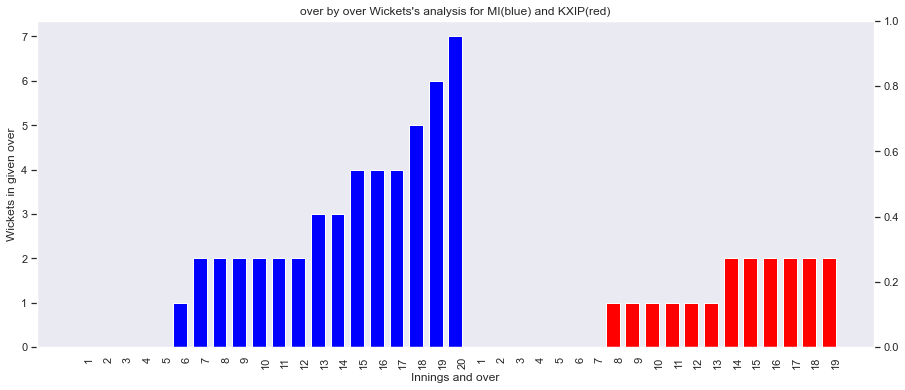

In [152]:
# 
out_df = train_df[train_df.match_id == 11145]
fig, ax1 = plt.subplots(figsize=(15,6))
ax2 = ax1.twinx()
labels = np.array(out_df['over'])
ind = np.arange(len(labels))
width = 0.7
rects = ax1.bar(ind, np.array(out_df['innings_wickets']), width=width, color=['blue']*20 + ['red']*20)
ax1.set_xticks(ind+((width)/2.))
ax1.set_xticklabels(labels, rotation='vertical')
ax1.set_ylabel("Wickets in given over")
ax1.set_xlabel("Innings and over")
ax1.set_title("over by over Wickets's analysis for MI(blue) and KXIP(red)")
plt.show()


### match 11315 where Mumbai Indian s was winner

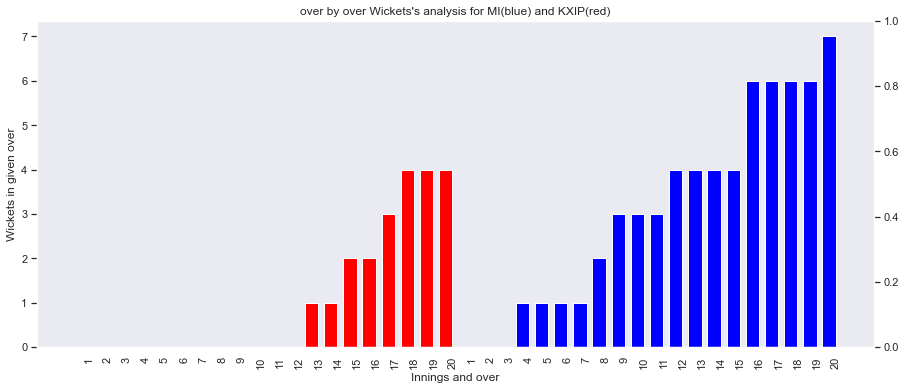

In [154]:
out_df_ = train_df[train_df.match_id == 11315]
fig, ax1 = plt.subplots(figsize=(15,6))
ax2 = ax1.twinx()
labels = np.array(out_df_['over'])
ind = np.arange(len(labels))
width = 0.7
rects = ax1.bar(ind, np.array(out_df_['innings_wickets']), width=width, color=['red']*20 + ['blue']*20)
ax1.set_xticks(ind+((width)/2.))
ax1.set_xticklabels(labels, rotation='vertical')
ax1.set_ylabel("Wickets in given over")
ax1.set_xlabel("Innings and over")
ax1.set_title("over by over Wickets's analysis for MI(blue) and KXIP(red)")
plt.show()



In [150]:
match_11145 = out_df[(out_df.inning == 1)].innings_wickets.max() + out_df[(out_df.inning == 2)].innings_wickets.max()
match_11315 = out_df_[(out_df_.inning == 1)].innings_wickets.max() + out_df_[(out_df_.inning == 2)].innings_wickets.max()
print("total wickets in past MI vs KXIP matches are",match_11145, " and ", match_11315)

total wickets in past MI vs KXIP matches are 9  and  11


## wickets taken will be in between 9-11

################################################################################################################################
# Q1 : Who will win the match?
################################################################################################################################

# 1.1
## past 2 matches (match_id  = 11145, 11315 whwre squad was almost same)

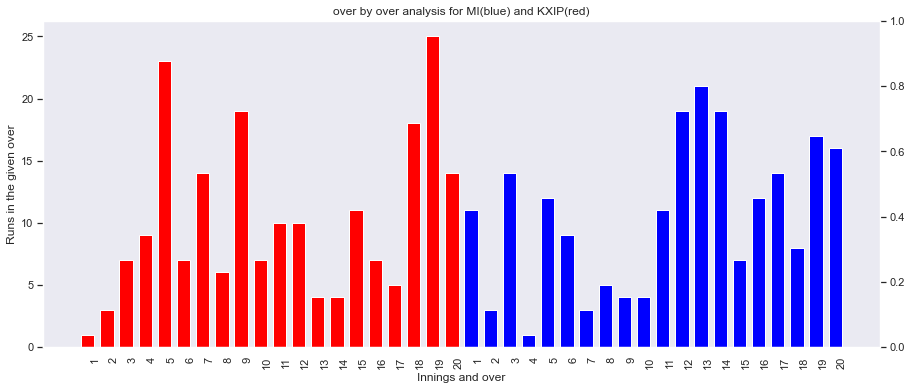

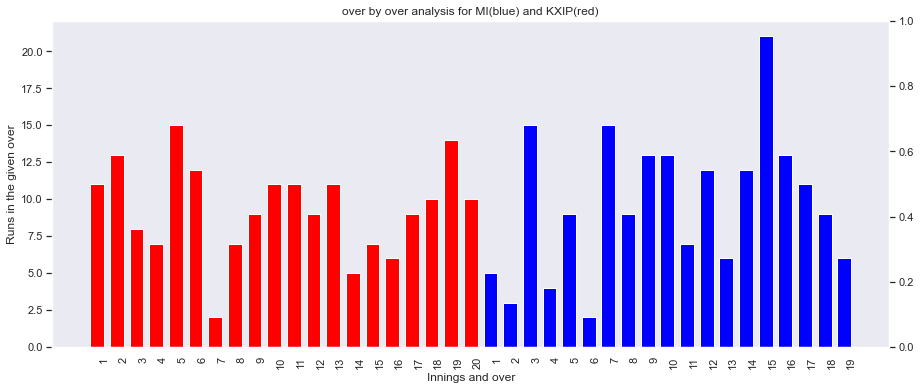

In [155]:
# 11315

fig, ax1 = plt.subplots(figsize=(15,6))
ax2 = ax1.twinx()
labels = np.array(out_df_['over'])
ind = np.arange(len(labels))
width = 0.7
rects = ax1.bar(ind, np.array(out_df_['total_runs']), width=width, color=['red']*20 + ['blue']*20)
ax1.set_xticks(ind+((width)/2.))
ax1.set_xticklabels(labels, rotation='vertical')
ax1.set_ylabel("Runs in the given over")
ax1.set_xlabel("Innings and over")
ax1.set_title("over by over analysis for MI(blue) and KXIP(red)")
plt.show()

# 11145
fig, ax1 = plt.subplots(figsize=(15,6))
ax2 = ax1.twinx()
labels = np.array(out_df['over'])
ind = np.arange(len(labels))
width = 0.7
rects = ax1.bar(ind, np.array(out_df['total_runs']), width=width, color=['red']*20 + ['blue']*20)
ax1.set_xticks(ind+((width)/2.))
ax1.set_xticklabels(labels, rotation='vertical')
ax1.set_ylabel("Runs in the given over")
ax1.set_xlabel("Innings and over")
ax1.set_title("over by over analysis for MI(blue) and KXIP(red)")
plt.show()

# 1.2

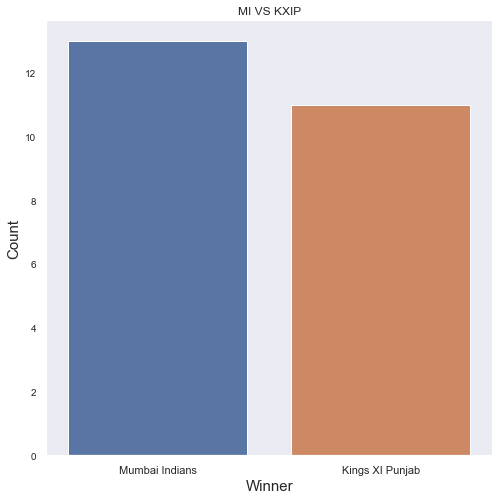

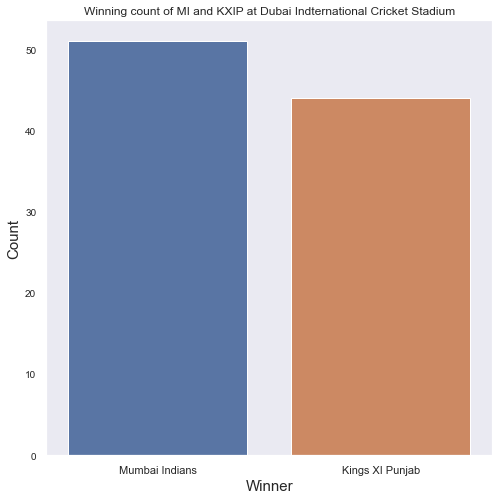

In [151]:
matches_MK = matches[((matches.team1 == "Mumbai Indians") & (matches.team2 == "Kings XI Punjab")) | ((matches.team2 == "Mumbai Indians") & (matches.team1 == "Kings XI Punjab"))]
sns.set(style='dark')
fig=plt.gcf()
fig.set_size_inches(8,8)

sns.countplot(x="winner",data=matches_MK)
plt.xlabel('Winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.yticks(fontsize=10)
plt.title('MI VS KXIP')
plt.show()

# venue wise winners
venue_MI = matches[(matches.venue == "Dubai International Cricket Stadium") & ((matches.team1 == "Mumbai Indians")) | ((matches.team2 == "Mumbai Indians"))]
venue_KXIP = matches[(matches.venue == "Dubai International Cricket Stadium") & ((matches.team1 == "Kings XI Punjab")) | ((matches.team2 == "Kings XI Punjab"))]
venue_MI_ = venue_MI[venue_MI.winner == "Mumbai Indians"]
venue_KXIP_ = venue_KXIP[venue_KXIP.winner == "Kings XI Punjab"]
mk = [venue_MI_, venue_KXIP_]
venue_MI_KXIP = pd.concat(mk)

fig=plt.gcf()
fig.set_size_inches(8,8)

sns.countplot(x="winner",data=venue_MI_KXIP)
plt.xlabel('Winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.yticks(fontsize=10)
plt.title('Winning count of MI and KXIP at Dubai Indternational Cricket Stadium')
plt.show()

# From the analysis of all the parts Q1 to 5.
# MI will be the winner today